## Importing library and loading processed data

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from sklearn.model_selection import GridSearchCV

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel



import spacy
nlp = spacy.load('en_core_web_sm')
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [2]:
from matplotlib import pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import Counter
import plotly.tools as tls
import plotly.graph_objs as go
import base64
import numpy as np
import pandas as pd

import plotly.offline as py
py.init_notebook_mode(connected=True)

%matplotlib inline


In [3]:
df = pd.read_csv(
    'D:/Projects/Topic modelling/Code/topic_modelling/data_cleaning/Cleaned.csv')


In [4]:
df.head()

,Unnamed: 0,date,id,content,user,reply_count,retweet_count,likecount,quotecount,ct
0,0,2021-10-17 04:41:51+00:00,1.450000e+18,@SujibDr Thank Sir for the information. Last d...,https://twitter.com/MrinChemKar,0,0,0,0,thank information predict disastrous
1,1,2021-10-17 03:17:40+00:00,1.450000e+18,@biswajitmohanty when v hav allowed well entre...,https://twitter.com/amphan_may2020,0,0,0,0,century matter catch drug peddling
2,2,2021-10-16 15:06:12+00:00,1.450000e+18,"From the cities to the villages, Amphan left B...",https://twitter.com/ishadrita,1,0,1,0,left climate crisis
3,3,2021-10-16 15:03:42+00:00,1.450000e+18,"What many have mocked as my claim to stardom, ...",https://twitter.com/ishadrita,0,0,5,0,claim stardom believe night life floor apartment
4,4,2021-10-16 08:31:43+00:00,1.450000e+18,#WorldFogoodDay2021 \nIn the cyclone Amphan de...,https://twitter.com/ri_montu,0,7,17,0,area coast hard fogood time live price rice br...


In [5]:
df.isna().sum()

Unnamed: 0       0
date             0
id               0
content          0
user             0
reply_count      0
retweet_count    0
likecount        0
quotecount       0
ct               1
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.shape

(51433, 10)

## Removing stopwords


In [8]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])


In [9]:
df['ct'] = df['ct'].apply(lambda x: remove_stopwords(x))

In [10]:
df['ct']

0                     thank information predict disastrous
1                       century matter catch drug peddling
2                                      left climate crisis
3         claim stardom believe night life floor apartment
4        area coast hard fogood time live price rice br...
                               ...                        
51429                           understand produce musical
51430                         fantastic sort gross theater
51431                                 pick pair glass cool
51432                               orchestra listen music
51433                        homework listen music instead
Name: ct, Length: 51433, dtype: object

In [11]:
text=df.ct.values.tolist()

## Modelling

In [12]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print("="*70)


In [13]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

class LemmaCountVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))


In [14]:
tf_vectorizer = LemmaCountVectorizer(max_df=0.95,
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)


## LDA

In [15]:
lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=10)


In [16]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=10)

In [17]:
# params = {
#     'n_components': [10, 12,15],
#     'learning_decay': [0.75, 0.80, 0.85]
# }

# lda_search = GridSearchCV(lda,
#                           param_grid=params,
#                           cv=3,
#                           return_train_score=False)

# lda_search.fit(tf)

# results = pd.DataFrame(lda_search.cv_results_)


In [18]:
# best_lda_model = lda_search.best_estimator_
# print("Best Model's Params: ", lda_search.best_params_)


In [19]:
lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                learning_decay=0.85,
                                random_state=10)


In [20]:
lda.fit(tf)

LatentDirichletAllocation(learning_decay=0.85, learning_method='online',
                          learning_offset=50.0, max_iter=5, random_state=10)

## Getting our topics from the data using LDA

In [21]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)



Topics in LDA model: 

Topic #0:video link depression break deep strength double watch family main lose tweet fast president street twitter heart consider century click roof image long college condition book destructive short market fact impact land think mark train touch start self chance hear

Topic #1:wind heavy speed coast rain extremely intense high impact update alert coastal weather cross rainfall near devastate pray strong locust stay damage attack afternoon face pandemic flood hour bad earthquake forecast city brace massive crisis medium late force million close

Topic #2:worry believe guess order direct closer direction court claim faith particularly hind data tragic audit measure flooding high debate cool wide passage insurance occidental truth navy sarkar wont hide imagination dsitribute division machinery subsequent honorable tufan amra arm equally shameful

Topic #3:stay electricity day water power pray area safety service hope morning team work devastate dangerous home 

In [35]:
first_topic = lda.components_[1]
second_topic = lda.components_[3]
third_topic = lda.components_[4]
fourth_topic = lda.components_[9]


In [36]:
first_topic.shape


(8538,)

In [37]:
first_topic_words = [tf_feature_names[i]
                     for i in first_topic.argsort()[:-50 - 1:-1]]
second_topic_words = [tf_feature_names[i]
                      for i in second_topic.argsort()[:-50 - 1:-1]]
third_topic_words = [tf_feature_names[i]
                     for i in third_topic.argsort()[:-50 - 1:-1]]
fourth_topic_words = [tf_feature_names[i]
                      for i in fourth_topic.argsort()[:-50 - 1:-1]]


## Visualising our wordcloud for topics

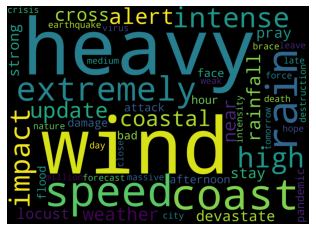

In [38]:
from wordcloud import WordCloud
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

firstcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()


Here tha talk is all about the extreme climatic events that have occured due to the cyclone like high wind speed,floods,rains,etc.
<!-- 
Here the talk is happening about survey conducted by the governement,people were questioning the govt about funds, politics happening due to funds related issue like corruption, poeple were concerned about the funds not being able to reach them in the time of a disaster event -->

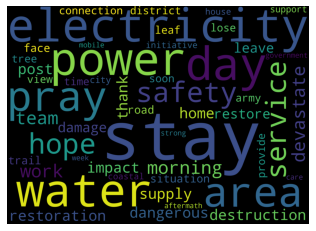

In [39]:
secondcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(second_topic_words))
plt.imshow(secondcloud)
plt.axis('off')
plt.show()


People here are seen talking about the damage caused by the cyclone before and after its occurence. Basic necessities like electricity,clean fresh drinking water,cell services,stc are unavailable. People are helping each others affected in the time of crisis.

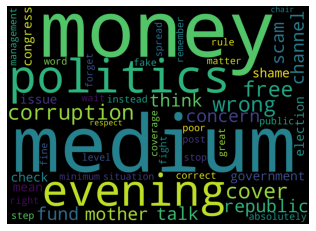

In [40]:
thirdcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(third_topic_words))
plt.imshow(thirdcloud)
plt.axis('off')
plt.show()


Here the talk is about funds where the people are in need in assistance and they are questioning the govt about funds, individual organisation have come in help of people affected and even people are askked to make donation for the affected.

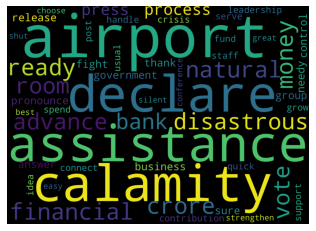

In [41]:
fourthcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(fourth_topic_words))
plt.imshow(fourthcloud)
plt.axis('off')
plt.show()


Here the talk is happening about survey conducted by the governement,people were questioning the govt about funds, politics happening due to funds related issue like corruption, poeple were concerned about the funds not being able to reach them in the time of a disaster event .
Different travelling modes have been hindered and people are unavailable to travel and people are immediate need of assistance


## Predict topics for given sentence

In [29]:
df_topic_keywords = pd.DataFrame(lda.components_)


In [30]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in [
                         '-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out


def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    mytext_2 = list(sent_to_words(text))

    mytext_3 = lemmatization(mytext_2, allowed_postags=[
                             'NOUN', 'ADJ', 'VERB', 'ADV'])

    mytext_4 = tf_vectorizer.transform(mytext_3)

    topic_probability_scores = lda.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(
        topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores





In [31]:
mytext = ["Feared from cyclone"]
topic, prob_scores = predict_topic(text=mytext)


In [32]:
lda_output = lda.transform(tf)


## Cluster documents that share same topic and similar topics

In [33]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

svd_model = TruncatedSVD(n_components=2)  
lda_output_svd = svd_model.fit_transform(lda_output)

x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

print("Component's weights: \n", np.round(svd_model.components_, 2))

print("Perc of Variance Explained: \n", np.round(
    svd_model.explained_variance_ratio_, 2))


Component's weights: 
 [[ 0.22  0.65  0.13  0.45  0.31  0.19  0.24  0.15  0.23  0.19]
 [-0.09  0.7  -0.04 -0.66 -0.2  -0.08 -0.1  -0.05 -0.07 -0.07]]
Perc of Variance Explained: 
 [0.04 0.26]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

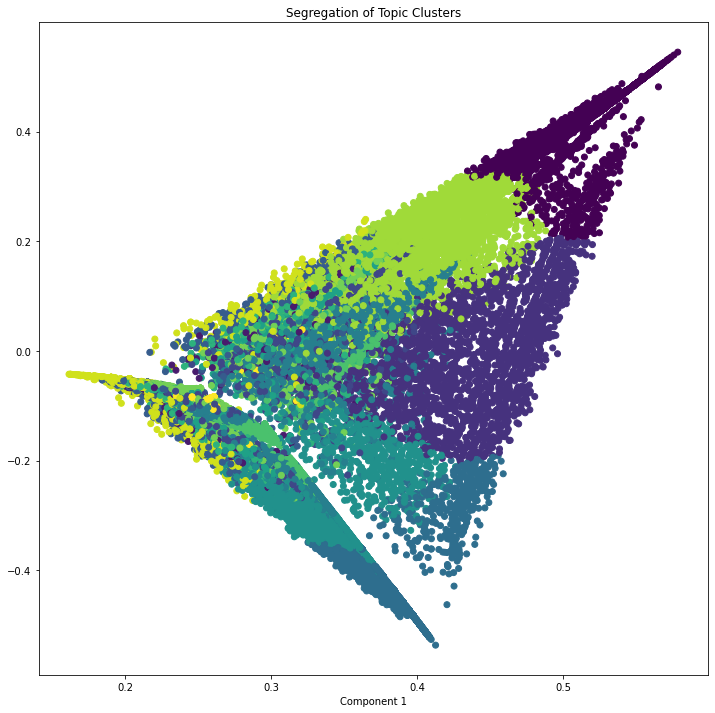

In [34]:
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )
